In [71]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cf
import netCDF4
import pandas as pd
import math
import seaborn as sns

In [139]:
extpar1 = xr.open_dataset( '../icon_extpar_0024_R02B06_G_20200917_tiles.nc', chunks={} )
grid1 = xr.open_dataset('../fc_DOM01_0121_mem001_NU_grid.nc')
cities = xr.open_dataset('../det_data_all_2022/fc_DOM01_0001_NU_urban_grid.nc')

In [140]:
src_data = np.degrees(np.asarray(extpar1["topography_c"]))
cx = np.degrees(np.asarray(grid1["clon"]))
cy = np.degrees(np.asarray(grid1["clat"]))

In [147]:
cities_coords = cities.where(
    (cities['clon'] >= 0.10472) &
    (cities['clon'] <= 0.418879) &
    (cities['clat'] >= 0.8030) &
    (cities['clat'] <= 0.959931),
    drop=True
)

In [149]:
cx_city = np.degrees(np.asarray(cities_coords["clon"]))
cy_city = np.degrees(np.asarray(cities_coords["clat"]))

In [153]:
# Set the limits for Europe
lon_min, lon_max = 5, 25 # Longitude range for Europe: -10, 40
lat_min, lat_max = 45, 55  # Latitude range for Europe: 40,50

# Filter data within the specified limits
mask = (cx >= lon_min) & (cx <= lon_max) & (cy >= lat_min) & (cy <= lat_max)
cx_europe = cx[mask]
cy_europe = cy[mask]
src_data_europe = src_data[mask]

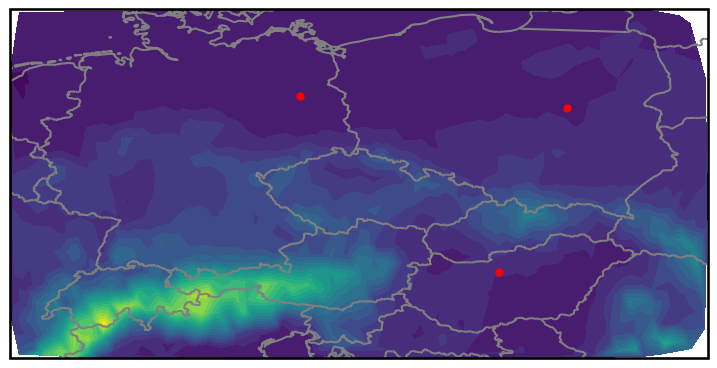

In [158]:
fig = plt.figure(figsize=(9, 9))
ax  = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cf.BORDERS, edgecolor='grey')
ax.add_feature(cf.COASTLINE, edgecolor='grey')
ax.tricontourf(cx_europe, cy_europe, src_data_europe, transform=ccrs.PlateCarree(), levels = 20)
ax.scatter(cx_city[:3], cy_city[:3], s=20, c='red', alpha=1, transform=ccrs.PlateCarree())
plt.savefig('../plots_2024/topography_map_ensemble.jpeg', dpi=200)
plt.show()